## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train, y_train = X_train[:7000], y_train[:7000]

X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Train shape:", X_mnist_train.shape, "Test shape:", X_mnist_test.shape)


Train shape: (5600, 784) Test shape: (1400, 784)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

/tmp/ipython-input-3443356953.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_mnist_train, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)


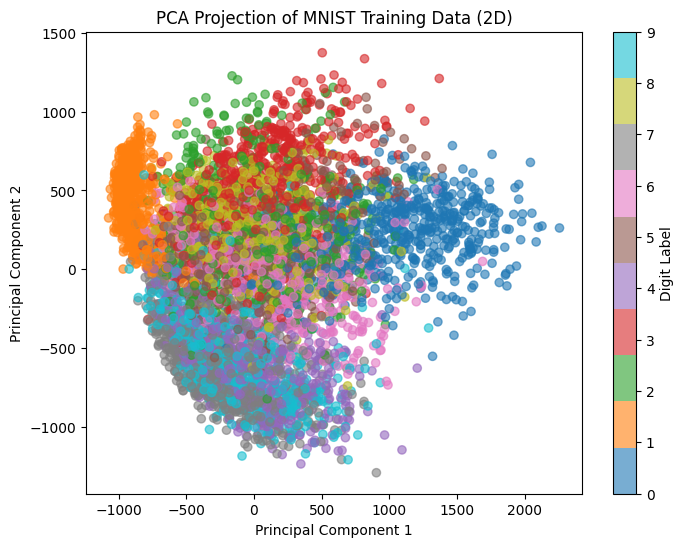

In [3]:
# Your code here
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_mnist_train)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_mnist_train, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of MNIST Training Data (2D)")
plt.show()


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

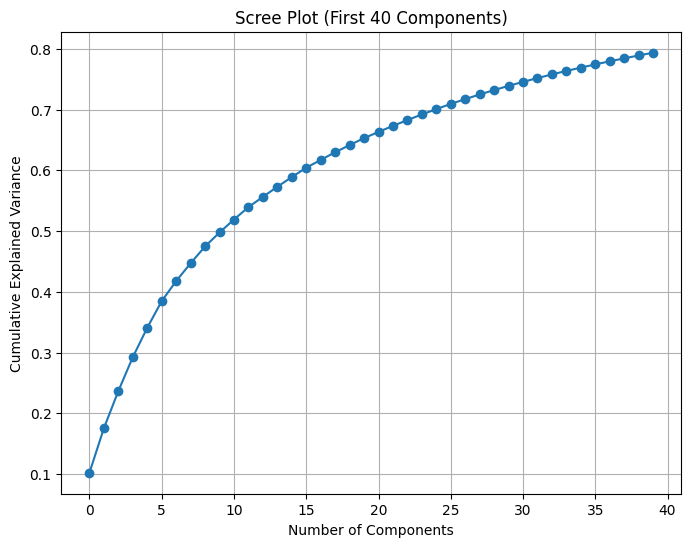

In [4]:
# Your code here
pca_full = PCA().fit(X_mnist_train)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_[:40]), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (First 40 Components)')
plt.grid(True)
plt.show()



#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [6]:
# Your code here
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cum_var >= 0.95) + 1

print("Number of components needed to explain 95% variance:", n_components_95)


Number of components needed to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

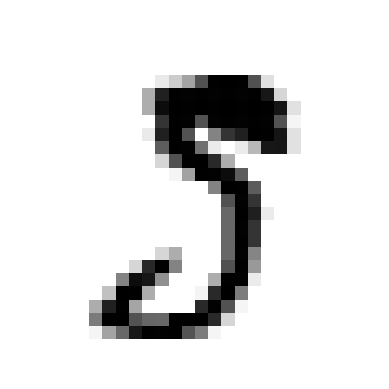

In [ ]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)

    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

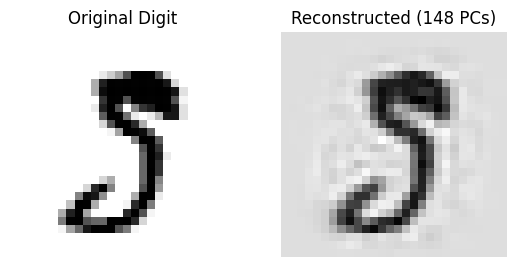

In [7]:
# Your code here

pca_reduced = PCA(n_components=n_components_95)
X_reduced = pca_reduced.fit_transform(X_mnist_train)

digit_original = X_mnist_train[0]
digit_reduced = pca_reduced.inverse_transform(X_reduced[0])

plt.subplot(1, 2, 1)
plt.imshow(digit_original.reshape(28, 28), cmap='binary')
plt.title("Original Digit")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(digit_reduced.reshape(28, 28), cmap='binary')
plt.title(f"Reconstructed ({n_components_95} PCs)")
plt.axis("off")

plt.show()


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [9]:
# Your code here


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mnist_train, y_mnist_train)
y_pred_no_pca = knn.predict(X_mnist_test)
acc_no_pca = accuracy_score(y_mnist_test, y_pred_no_pca)

pca_80 = PCA(0.80)   # keep 80% variance
X_train_pca = pca_80.fit_transform(X_mnist_train)
X_test_pca = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA (80% variance):", acc_pca)
print("Number of PCA components kept:", pca_80.n_components_)


Accuracy without PCA: 0.9428571428571428
Accuracy with PCA (80% variance): 0.9457142857142857
Number of PCA components kept: 42


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

/tmp/ipython-input-511789340.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_subset, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)


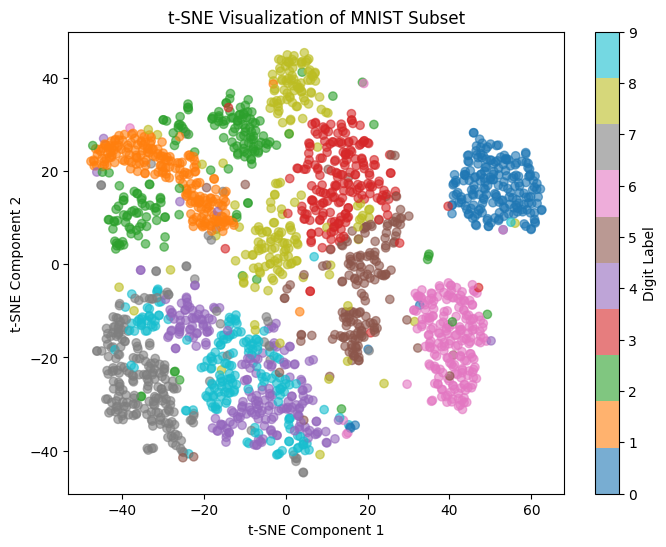

In [10]:
# Your code here
from sklearn.manifold import TSNE

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_subset, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of MNIST Subset")
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [11]:
# Your code here
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y_subset, test_size=0.2, random_state=42)

knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_train_tsne, y_train_tsne)
y_pred_tsne = knn_tsne.predict(X_test_tsne)
acc_tsne = accuracy_score(y_test_tsne, y_pred_tsne)

print("KNN accuracy on t-SNE-reduced data:", acc_tsne)


KNN accuracy on t-SNE-reduced data: 0.91


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-1119803623.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y_subset, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)


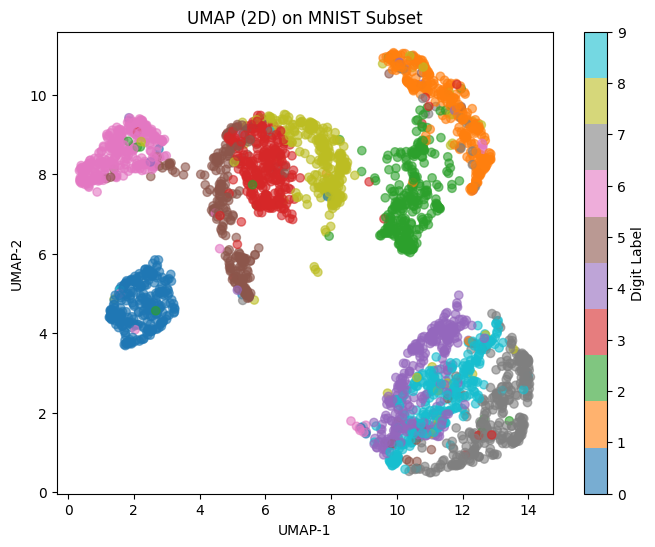

In [12]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

!pip -q install umap-learn

import umap
import matplotlib.pyplot as plt

X_subset = X_mnist_train[:3000]
y_subset = y_mnist_train[:3000]

reducer_2d = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="euclidean",
    random_state=42
)
X_umap_2d = reducer_2d.fit_transform(X_subset)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y_subset, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2"); plt.title("UMAP (2D) on MNIST Subset")
plt.show()


In [ ]:
# Your code here


Now, calculate accuracy with KNN.

In [13]:
# Your code here
X_subset_cls = X_mnist_train[:5000]
y_subset_cls = y_mnist_train[:5000]

reducer_10d = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=10,
    metric="euclidean",
    random_state=42
)
X_umap_10d = reducer_10d.fit_transform(X_subset_cls)

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_umap_10d, y_subset_cls, test_size=0.2, random_state=42
)

knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_u, y_train_u)
y_pred_u = knn_umap.predict(X_test_u)
acc_umap = accuracy_score(y_test_u, y_pred_u)

print("KNN accuracy on UMAP (10D) features:", acc_umap)
print("UMAP components used:", X_umap_10d.shape[1])


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy on UMAP (10D) features: 0.934
UMAP components used: 10


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


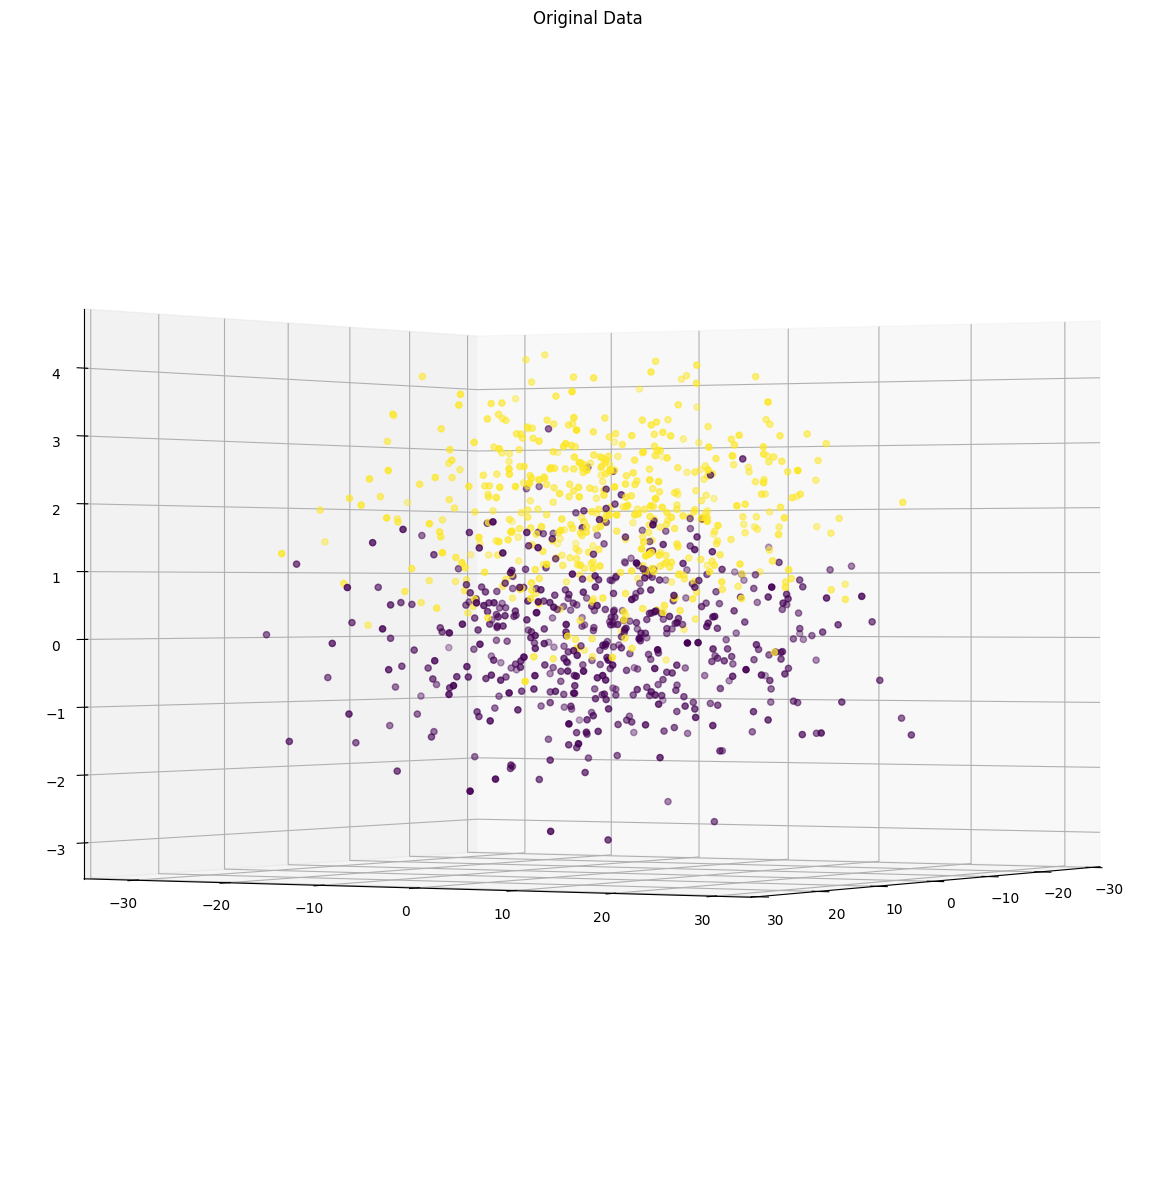

In [14]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [15]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [16]:
# Your code here

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)



In [17]:
# Your code here
print(f"PCA Data Accuracy: {acc_pca:.3f}")
print("Number of PCA components used:", X_pca.shape[1])


PCA Data Accuracy: 0.505
Number of PCA components used: 2


2. Try with UMAP.

In [18]:
# Your code here

reducer = umap.UMAP(n_components=10, random_state=42)
X_umap = reducer.fit_transform(X)

X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(
    X_umap, y, test_size=0.2, random_state=42
)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap, y_train_umap)
y_pred_umap = knn_umap.predict(X_test_umap)
acc_umap = accuracy_score(y_test_umap, y_pred_umap)



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
# Your code here
print(f"UMAP Data Accuracy: {acc_umap:.3f}")
print("UMAP embedding dimensions:", X_umap.shape[1])


UMAP Data Accuracy: 0.650
UMAP embedding dimensions: 10


Explain your results in the cell below.  Which works better?  Why?

UMAP worked better than PCA because it preserves local neighborhood structure, which aligns well with how KNN classifies data. PCA, being linear, lost too much information with only two components, leading to lower accuracy.